In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment2/'
FOLDERNAME = '/content/drive/MyDrive/Stanford Research/honor thesis for Ephysics/ephysics project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
# %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# !bash get_datasets.sh
# %cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive


In [2]:
# !pip install pymatgen
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

import sklearn
import csv
import pandas as pd
# import pymatgen as mg
import random
import os
from bisect import bisect_left   
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn import svm
# from mp_api.client import MPRester

#from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import time


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, KFold

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix


style.use("ggplot")

In [3]:
#shuffles dataset
def format_dataset(X, y, size = -1):
    random.seed(a=5)
    length = np.size(y)
    indices = np.arange(length)
    np.random.shuffle(indices)
    new_X = []
    new_y = []
    for x in indices:
        new_X.append(X[x])
        new_y.append(y[x])
    if size == -1:
        return Bunch(data=new_X, target=new_y)
    return Bunch(data=new_X[0:size], target=new_y[0:size])

#pos, neg are lists
def get_labels(pos, neg):
    y = []
    for i in range(len(pos)):
        y.append(1)
    for i in range(len(neg)):
        y.append(0)
    return np.array(y)


def calculate_classification_rates(predictions, labels):
    """
    Calculates the classification rates based on the predictions and labels.

    Args:
    - predictions: NumPy array of predicted values (shape: [n_samples])
    - labels: List of true labels (length: n_samples)

    Returns:
    - true_positive_rate: Float, true positive rate (TPR) or sensitivity
    - false_positive_rate: Float, false positive rate (FPR)
    - true_negative_rate: Float, true negative rate (TNR) or specificity
    - false_negative_rate: Float, false negative rate (FNR)
    """

    # Convert labels to NumPy array for easier manipulation
    labels = np.array(labels)

    # Calculate the number of true positive, false positive, true negative, and false negative
    true_positive = np.sum((predictions == 1) & (labels == 1))
    false_positive = np.sum((predictions == 1) & (labels == 0))
    true_negative = np.sum((predictions == 0) & (labels == 0))
    false_negative = np.sum((predictions == 0) & (labels == 1))

    # Calculate the rates
    true_positive_rate = true_positive / (true_positive + false_negative)
    false_positive_rate = false_positive / (false_positive + true_negative)
    true_negative_rate = true_negative / (true_negative + false_positive)
    false_negative_rate = false_negative / (false_negative + true_positive)

    return true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate

experiment with multiple:1


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1043, Train Acc: 96.60%, Val Loss: 0.1100, Val Acc: 97.76%
TP: 0.9752304147465438, TN: 0.9800228310502284, FP: 0.01997716894977169, FN: 0.02476958525345622
Epoch [2/5], Train Loss: 0.0495, Train Acc: 98.59%, Val Loss: 0.0281, Val Acc: 99.08%
TP: 0.9821428571428571, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.017857142857142856
Epoch [3/5], Train Loss: 0.0808, Train Acc: 97.73%, Val Loss: 0.0304, Val Acc: 99.03%
TP: 0.9930875576036866, TN: 0.9874429223744292, FP: 0.012557077625570776, FN: 0.0069124423963133645
Epoch [4/5], Train Loss: 0.0510, Train Acc: 98.62%, Val Loss: 0.1132, Val Acc: 97.53%
TP: 0.9637096774193549, TN: 0.9868721461187214, FP: 0.013127853881278538, FN: 0.036290322580645164
Epoch [5/5], Train Loss: 0.0830, Train Acc: 97.68%, Val Loss: 0.1922, Val Acc: 91.54%
TP: 0.9763824884792627, TN: 0.8550228310502284, FP: 0.1449771689497717, FN: 0.023617511520737326


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1626, Train Acc: 94.48%, Val Loss: 0.1217, Val Acc: 96.85%
TP: 0.9395161290322581, TN: 0.9971461187214612, FP: 0.0028538812785388126, FN: 0.06048387096774194
Epoch [2/5], Train Loss: 0.0557, Train Acc: 98.18%, Val Loss: 0.0270, Val Acc: 99.31%
TP: 0.9879032258064516, TN: 0.9982876712328768, FP: 0.0017123287671232876, FN: 0.012096774193548387
Epoch [3/5], Train Loss: 0.0331, Train Acc: 99.02%, Val Loss: 0.0828, Val Acc: 97.94%
TP: 0.9619815668202765, TN: 0.9965753424657534, FP: 0.003424657534246575, FN: 0.038018433179723504
Epoch [4/5], Train Loss: 0.0871, Train Acc: 97.28%, Val Loss: 0.5297, Val Acc: 79.50%
TP: 0.8145161290322581, TN: 0.7756849315068494, FP: 0.2243150684931507, FN: 0.18548387096774194
Epoch [5/5], Train Loss: 0.4588, Train Acc: 83.07%, Val Loss: 0.5157, Val Acc: 80.56%
TP: 0.8375576036866359, TN: 0.773972602739726, FP: 0.22602739726027396, FN: 0.16244239631336405


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1442, Train Acc: 95.99%, Val Loss: 0.1880, Val Acc: 95.01%
TP: 0.90097869890616, TN: 0.9988577955454027, FP: 0.001142204454597373, FN: 0.09902130109383996
Epoch [2/5], Train Loss: 0.0813, Train Acc: 98.09%, Val Loss: 0.0915, Val Acc: 98.11%
TP: 0.9683362118595279, TN: 0.9937178754997145, FP: 0.006282124500285551, FN: 0.03166378814047208
Epoch [3/5], Train Loss: 0.0565, Train Acc: 98.57%, Val Loss: 0.0595, Val Acc: 98.25%
TP: 0.9666090961427749, TN: 0.9982866933181039, FP: 0.0017133066818960593, FN: 0.0333909038572251
Epoch [4/5], Train Loss: 0.0395, Train Acc: 98.93%, Val Loss: 0.2050, Val Acc: 96.47%
TP: 0.9309153713298791, TN: 0.9982866933181039, FP: 0.0017133066818960593, FN: 0.0690846286701209
Epoch [5/5], Train Loss: 0.0400, Train Acc: 98.81%, Val Loss: 0.6652, Val Acc: 90.68%
TP: 0.9965457685664939, TN: 0.817818389491719, FP: 0.182181610508281, FN: 0.0034542314335060447


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1053, Train Acc: 96.82%, Val Loss: 0.1267, Val Acc: 96.53%
TP: 0.9567972350230415, TN: 0.9737292975442604, FP: 0.026270702455739578, FN: 0.043202764976958526
Epoch [2/5], Train Loss: 0.0490, Train Acc: 98.58%, Val Loss: 0.0313, Val Acc: 99.23%
TP: 0.9890552995391705, TN: 0.9954311821816105, FP: 0.004568817818389492, FN: 0.010944700460829493
Epoch [3/5], Train Loss: 0.0337, Train Acc: 99.15%, Val Loss: 0.0372, Val Acc: 99.00%
TP: 0.9919354838709677, TN: 0.9880068532267275, FP: 0.011993146773272416, FN: 0.008064516129032258
Epoch [4/5], Train Loss: 0.2926, Train Acc: 90.09%, Val Loss: 0.4736, Val Acc: 82.16%
TP: 0.8433179723502304, TN: 0.8001142204454598, FP: 0.19988577955454026, FN: 0.15668202764976957
Epoch [5/5], Train Loss: 0.6397, Train Acc: 58.30%, Val Loss: 0.6938, Val Acc: 49.78%
TP: 1.0, TN: 0.0, FP: 1.0, FN: 0.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1233, Train Acc: 96.56%, Val Loss: 0.2814, Val Acc: 90.88%
TP: 0.9896313364055299, TN: 0.828669331810394, FP: 0.17133066818960593, FN: 0.010368663594470046
Epoch [2/5], Train Loss: 0.1327, Train Acc: 96.54%, Val Loss: 0.0523, Val Acc: 98.51%
TP: 0.9735023041474654, TN: 0.9965733866362079, FP: 0.0034266133637921186, FN: 0.026497695852534562
Epoch [3/5], Train Loss: 0.1312, Train Acc: 96.37%, Val Loss: 0.3557, Val Acc: 92.52%
TP: 0.8859447004608295, TN: 0.9640205596801827, FP: 0.03597944031981725, FN: 0.11405529953917051
Epoch [4/5], Train Loss: 0.0555, Train Acc: 98.55%, Val Loss: 0.0534, Val Acc: 98.88%
TP: 0.9775345622119815, TN: 1.0, FP: 0.0, FN: 0.022465437788018433
Epoch [5/5], Train Loss: 0.0567, Train Acc: 98.32%, Val Loss: 0.0956, Val Acc: 96.79%
TP: 0.9366359447004609, TN: 0.9988577955454027, FP: 0.001142204454597373, FN: 0.06336405529953917
Testing - Loss: 0.0545, Acc: 97.89%, TP: 2126, TN: 2142, FP: 0, FN: 92
experiment with multiple:4


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1070, Train Acc: 96.86%, Val Loss: 0.3320, Val Acc: 88.10%
TP: 0.730221969265794, TN: 0.919000430848772, FP: 0.08099956915122791, FN: 0.26977803073420603
Epoch [2/5], Train Loss: 0.4295, Train Acc: 79.90%, Val Loss: 0.5112, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.5059, Train Acc: 79.86%, Val Loss: 0.5056, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.5042, Train Acc: 79.86%, Val Loss: 0.5113, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.5017, Train Acc: 79.83%, Val Loss: 0.5025, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1098, Train Acc: 97.11%, Val Loss: 0.1556, Val Acc: 97.02%
TP: 0.8519362186788155, TN: 1.0, FP: 0.0, FN: 0.1480637813211845
Epoch [2/5], Train Loss: 0.2432, Train Acc: 84.28%, Val Loss: 0.2494, Val Acc: 85.89%
TP: 0.9886104783599089, TN: 0.8262243285939969, FP: 0.17377567140600317, FN: 0.011389521640091117
Epoch [3/5], Train Loss: 0.2757, Train Acc: 81.52%, Val Loss: 0.2521, Val Acc: 85.26%
TP: 0.9874715261958997, TN: 0.8186126669538992, FP: 0.18138733304610083, FN: 0.012528473804100227
Epoch [4/5], Train Loss: 0.2754, Train Acc: 81.70%, Val Loss: 0.2541, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2853, Train Acc: 80.22%, Val Loss: 0.2676, Val Acc: 84.09%
TP: 0.9829157175398633, TN: 0.8051127387620278, FP: 0.19488726123797215, FN: 0.017084282460136675


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0633, Train Acc: 98.19%, Val Loss: 0.6488, Val Acc: 87.46%
TP: 0.9823462414578588, TN: 0.8474795346833262, FP: 0.15252046531667385, FN: 0.01765375854214123
Epoch [2/5], Train Loss: 0.0389, Train Acc: 99.08%, Val Loss: 0.0206, Val Acc: 99.64%
TP: 0.9931662870159453, TN: 0.9972712911101537, FP: 0.0027287088898463306, FN: 0.00683371298405467
Epoch [3/5], Train Loss: 0.1344, Train Acc: 95.65%, Val Loss: 0.4172, Val Acc: 81.52%
TP: 0.5837129840546698, TN: 0.8736176935229067, FP: 0.1263823064770932, FN: 0.4162870159453303
Epoch [4/5], Train Loss: 0.4963, Train Acc: 80.25%, Val Loss: 0.5029, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.5064, Train Acc: 79.85%, Val Loss: 0.5025, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.1108, Train Acc: 96.98%, Val Loss: 0.1757, Val Acc: 94.23%
TP: 0.9447608200455581, TN: 0.9416917995117047, FP: 0.05830820048829528, FN: 0.055239179954441914
Epoch [2/5], Train Loss: 0.2692, Train Acc: 89.08%, Val Loss: 0.4381, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.4388, Train Acc: 79.44%, Val Loss: 0.4356, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.4375, Train Acc: 79.58%, Val Loss: 0.4325, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.4338, Train Acc: 79.73%, Val Loss: 0.4355, Val Acc: 79.86%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2706, Train Acc: 89.76%, Val Loss: 0.5104, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.5068, Train Acc: 79.86%, Val Loss: 0.5065, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.5062, Train Acc: 79.86%, Val Loss: 0.5031, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.5053, Train Acc: 79.86%, Val Loss: 0.5025, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.5057, Train Acc: 79.86%, Val Loss: 0.5029, Val Acc: 79.85%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Testing - Loss: 0.4924, Acc: 80.58%, TP: 0, TN: 8782, FP: 0, FN: 2117
experiment with multiple:16


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2282, Train Acc: 94.07%, Val Loss: 0.2250, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.2276, Train Acc: 94.08%, Val Loss: 0.2295, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.2246, Train Acc: 94.08%, Val Loss: 0.2232, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.2246, Train Acc: 94.08%, Val Loss: 0.2248, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2269, Train Acc: 94.08%, Val Loss: 0.2255, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2279, Train Acc: 94.08%, Val Loss: 0.2247, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.2279, Train Acc: 94.08%, Val Loss: 0.2293, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.2272, Train Acc: 94.08%, Val Loss: 0.2280, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.2272, Train Acc: 94.08%, Val Loss: 0.2259, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2268, Train Acc: 94.08%, Val Loss: 0.2255, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2272, Train Acc: 94.07%, Val Loss: 0.2258, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.2277, Train Acc: 94.08%, Val Loss: 0.2261, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.2275, Train Acc: 94.08%, Val Loss: 0.2247, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.2272, Train Acc: 94.08%, Val Loss: 0.2317, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2268, Train Acc: 94.08%, Val Loss: 0.2248, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2283, Train Acc: 94.07%, Val Loss: 0.2279, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.2276, Train Acc: 94.08%, Val Loss: 0.2256, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.2274, Train Acc: 94.08%, Val Loss: 0.2247, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.2271, Train Acc: 94.08%, Val Loss: 0.2249, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2269, Train Acc: 94.08%, Val Loss: 0.2271, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.2276, Train Acc: 94.07%, Val Loss: 0.2249, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.2274, Train Acc: 94.08%, Val Loss: 0.2254, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.2272, Train Acc: 94.08%, Val Loss: 0.2251, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.2270, Train Acc: 94.08%, Val Loss: 0.2247, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.2270, Train Acc: 94.08%, Val Loss: 0.2250, Val Acc: 94.08%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Testing - Loss: 0.2204, Acc: 94.25%, TP: 0, TN: 34928, FP: 0, FN: 2129
experiment with multiple:64


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0813, Train Acc: 98.46%, Val Loss: 0.0801, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.0809, Train Acc: 98.46%, Val Loss: 0.0794, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.0806, Train Acc: 98.46%, Val Loss: 0.0795, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.0805, Train Acc: 98.46%, Val Loss: 0.0796, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.0802, Train Acc: 98.46%, Val Loss: 0.0815, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0811, Train Acc: 98.46%, Val Loss: 0.0799, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.0810, Train Acc: 98.46%, Val Loss: 0.0796, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.0807, Train Acc: 98.46%, Val Loss: 0.0794, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.0806, Train Acc: 98.46%, Val Loss: 0.0796, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.0804, Train Acc: 98.46%, Val Loss: 0.0803, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0812, Train Acc: 98.46%, Val Loss: 0.0840, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.0809, Train Acc: 98.46%, Val Loss: 0.0804, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.0807, Train Acc: 98.46%, Val Loss: 0.0795, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.0805, Train Acc: 98.46%, Val Loss: 0.0802, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.0802, Train Acc: 98.46%, Val Loss: 0.0794, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0814, Train Acc: 98.46%, Val Loss: 0.0794, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.0807, Train Acc: 98.46%, Val Loss: 0.0795, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.0806, Train Acc: 98.46%, Val Loss: 0.0796, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.0805, Train Acc: 98.46%, Val Loss: 0.0795, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.0802, Train Acc: 98.46%, Val Loss: 0.0796, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0


<ipython-input-4-6cf5a5b7c973>:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-4-6cf5a5b7c973>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-4-6cf5a5b7c973>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/5], Train Loss: 0.0813, Train Acc: 98.46%, Val Loss: 0.0795, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [2/5], Train Loss: 0.0808, Train Acc: 98.46%, Val Loss: 0.0809, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [3/5], Train Loss: 0.0807, Train Acc: 98.46%, Val Loss: 0.0801, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [4/5], Train Loss: 0.0805, Train Acc: 98.46%, Val Loss: 0.0805, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Epoch [5/5], Train Loss: 0.0803, Train Acc: 98.46%, Val Loss: 0.0799, Val Acc: 98.46%
TP: 0.0, TN: 1.0, FP: 0.0, FN: 1.0
Testing - Loss: 0.0802, Acc: 98.46%, TP: 0, TN: 139498, FP: 0, FN: 2189


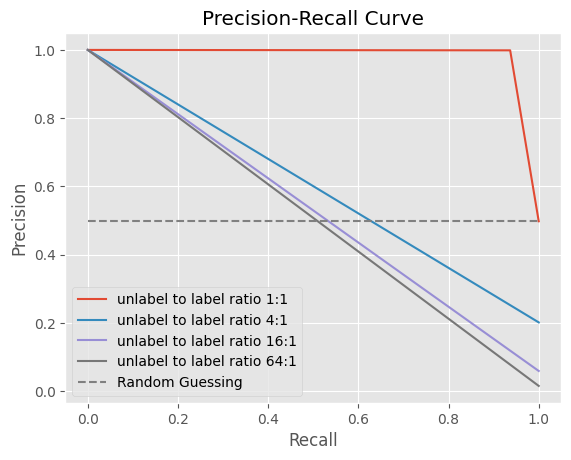

In [4]:
# Define MLP model
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(input_dim, nhead=4), num_layers=4)
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(0.2)
        self.activation = nn.ELU()
        self.output_layer = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        x = self.transformer(x)
        # x = x.mean(dim=1)  # Average pooling across time steps
        x = self.fc(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

multipliers = [1,4, 16, 64] #1, 2, 4, 8, 16, 32, 64, 128
test_accs = []
test_losses = []
for multip in multipliers:
  print('experiment with multiple:' + str(multip))
  ## loading data
  X_pos = np.load(FOLDERNAME + '/partial_perfect_in_icsd.npy')
  X_neg = np.load(FOLDERNAME + '/not_in_icsd_proofread.npy')
  X_neg = X_neg[:10899*multip, :]

  #concatenate the features together and scale
  X = np.concatenate((X_pos, X_neg), axis = 0)
  std_scale=preprocessing.StandardScaler().fit(X)
  X = std_scale.transform(X)

  #get output label
  y = []

  y=get_labels(X_pos,X_neg)

  # Split the data into training and testing sets
  X_da_train, X_test, y_da_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

  # Check if GPU is available
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Convert the data to PyTorch tensors and move them to the GPU
  X_da_train = torch.tensor(X_da_train, dtype=torch.float32).to(device)
  y_da_train = torch.tensor(y_da_train, dtype=torch.float32).to(device)
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
  skf = StratifiedKFold(n_splits=5, shuffle=True)

  # Hyperparameters
  batch_size = 32
  learning_rate = 0.001
  num_epochs = 5 #try 5 for early stopping og is 10

  # Lists to store losses and accuracies
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  # Perform k-fold cross-validation
  for train_index, val_index in skf.split(X_da_train.cpu().numpy(), y_da_train.cpu().numpy()):
      # Move the data back to CPU
      X_train, X_val = X_da_train[train_index].cpu(), X_da_train[val_index].cpu()
      y_train, y_val = y_da_train[train_index].cpu(), y_da_train[val_index].cpu()

      # Convert data to PyTorch tensors and move to device
      X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
      y_train = torch.tensor(y_train, dtype=torch.long).to(device)
      X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
      y_val = torch.tensor(y_val, dtype=torch.long).to(device)

      # Create DataLoader for batch training
      train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
      train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

      # Initialize the Transformer model
      model = TransformerClassifier(input_dim=112, hidden_dim=256, num_classes=2).to(device)
      
      # Define the loss function and optimizer
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.parameters(), lr=learning_rate)

      # Training loop
      for epoch in range(num_epochs):
          model.train()
          running_loss = 0.0
          correct = 0
          total = 0

          for inputs, labels in train_loader:
            optimizer.zero_grad()
            # inputs = inputs.unsqueeze(1)  # Add a dimension for the sequence length
            # inputs = inputs.permute(0, 2, 1)  # Transpose to (batch_size, input_dim, sequence_length)
            # inputs = inputs.T
            # print(inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

          # Compute training accuracy and loss
          train_acc = 100 * correct / total
          train_loss = running_loss / len(train_loader)

          # Record training accuracy and loss
          train_accs.append(train_acc)
          train_losses.append(train_loss)

          # Evaluation on validation set
          model.eval()
          with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_acc = 100 * (val_predicted == y_val).sum().item() / y_val.size(0)
            # Record validation accuracy and loss
            val_accs.append(val_acc)
            val_losses.append(val_loss.item())

            # Calculate confusion matrix
            val_true = y_val.cpu().numpy()
            val_pred = val_predicted.cpu().numpy()
            tn, fp, fn, tp = confusion_matrix(val_true, val_pred).ravel()

            # Calculate rates
            val_tp_rate = tp / (tp + fn)
            val_tn_rate = tn / (tn + fp)
            val_fp_rate = fp / (fp + tn)
            val_fn_rate = fn / (fn + tp)

            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
                  f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.2f}%")
            print(f"TP: {val_tp_rate}, " f"TN: {val_tn_rate}, " f"FP: {val_fp_rate}, " f"FN: {val_fn_rate}")
  # Testing
  with torch.no_grad():
    test_outputs = model(X_test)
    y_test = y_test.long()
    test_loss = criterion(test_outputs, y_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_acc = 100 * (test_predicted == y_test).sum().item() / y_test.size(0)
    test_tp = ((test_predicted == 1) & (y_test == 1)).sum().item()
    test_tn = ((test_predicted == 0) & (y_test == 0)).sum().item()
    test_fp = ((test_predicted == 1) & (y_test == 0)).sum().item()
    test_fn = ((test_predicted == 0) & (y_test == 1)).sum().item()
    # Record testing accuracy and loss
    test_accs.append(test_acc)
    test_losses.append(test_loss.item())

    print(f"Testing - "
          f"Loss: {test_loss.item():.4f}, "
          f"Acc: {test_acc:.2f}%, "
          f"TP: {test_tp}, "
          f"TN: {test_tn}, "
          f"FP: {test_fp}, "
          f"FN: {test_fn}")
    precision, recall, _ = precision_recall_curve(val_true, val_pred)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f"unlabel to label ratio {multip}:1")

# Plot random guessing line
plt.plot([0, 1], [0.5, 0.5], linestyle="--", color="gray", label="Random Guessing")

# Set plot properties
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Show the plot
plt.show()